In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv('scores_data.csv')
print("Shape of data:",df.shape)
df.head(3)

Shape of data: (149, 3)


,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7


In [14]:
df.isnull().sum()

,0
Batch,0
User_ID,0
Score,0


In [15]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [16]:
df.columns=df.columns.str.strip()
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [28]:
df['Acquired_Score']=df['Score'].astype(str).str.split('/').str[0]
df['Acquired_Score']=df['Acquired_Score'].astype(int)
df.sample()

,Batch,User_ID,Score,Acquired_Score
13,AI_ELITE_7,uid_136,5 / 7,5


##Descriptive Stats

In [34]:
Score_stats=df['Acquired_Score'].describe()
print('Acquired Score Stats:')
print(Score_stats)

print('-'*30)
print('-'*30)

batch_wise_stats=df.groupby('Batch')['Acquired_Score'].agg(['count','min','max','mean','median'])
print('Batch Wise Stats:')
batch_wise_stats

Acquired Score Stats:
count    149.000000
mean       4.382550
std        1.592199
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: Acquired_Score, dtype: float64
------------------------------
------------------------------
Batch Wise Stats:


,count,min,max,mean,median
Batch,,,,,
AI_ELITE_4,48,0,7,3.791667,4.0
AI_ELITE_6,48,0,7,4.229167,4.0
AI_ELITE_7,53,2,7,5.056604,5.0


##Top Performers Percentage

In [41]:
high_score_batches=df[df['Acquired_Score']==7]
top_performers=high_score_batches['Batch'].value_counts()

batch_counts = df['Batch'].value_counts()

percentage=(top_performers/batch_counts)*100
print('Percentage of top performers in each batch:')
print(percentage)

Percentage of top performers in each batch:
Batch
AI_ELITE_7    18.867925
AI_ELITE_6    10.416667
AI_ELITE_4     6.250000
Name: count, dtype: float64


##Low Performers Percentage

In [42]:
low_score_batches=df[df['Acquired_Score']<=2]
low_performers=low_score_batches['Batch'].value_counts()

batch_counts = df['Batch'].value_counts()

percentage=(low_performers/batch_counts)*100
print('Percentage of low performers in each batch:')
print(percentage)

Percentage of low performers in each batch:
Batch
AI_ELITE_4    18.750000
AI_ELITE_6    12.500000
AI_ELITE_7     3.773585
Name: count, dtype: float64


##Histogram of Scores per Batch

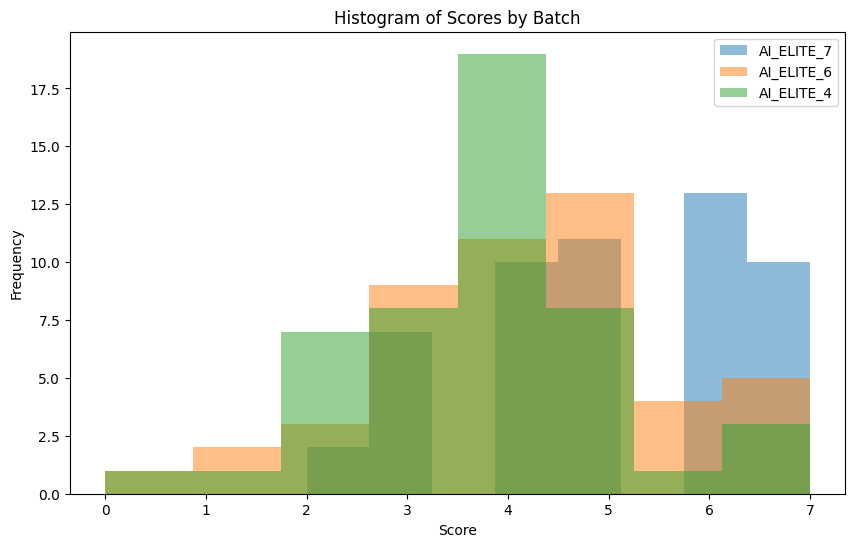

In [52]:
plt.figure(figsize=(10,6))

for batch in df['Batch'].unique():
    subset = df[df['Batch'] == batch]
    plt.hist(subset['Acquired_Score'], bins=8, alpha=0.5, label=batch)

plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores by Batch')
plt.legend()
plt.show()


##Bar Chart of Average Scores per Batch

<Axes: xlabel='Batch', ylabel='Acquired_Score'>

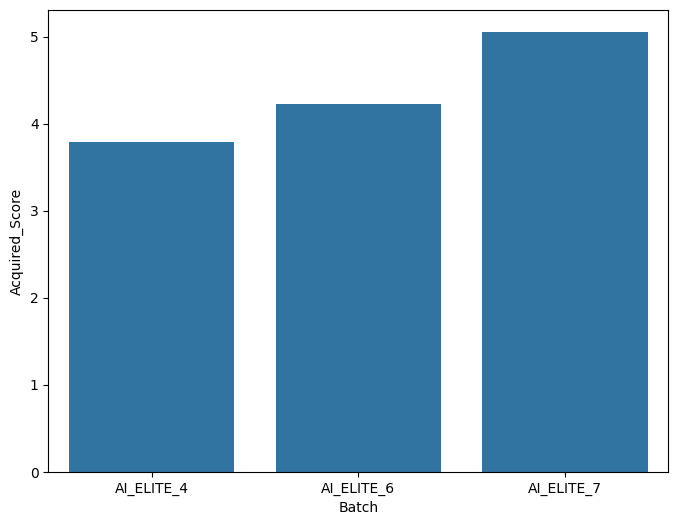

In [49]:
plt.figure(figsize=(8,6))
sns.barplot(df.groupby('Batch')['Acquired_Score'].mean())

##Box Plot Comparing Score Distributions

<Axes: xlabel='Batch', ylabel='Acquired_Score'>

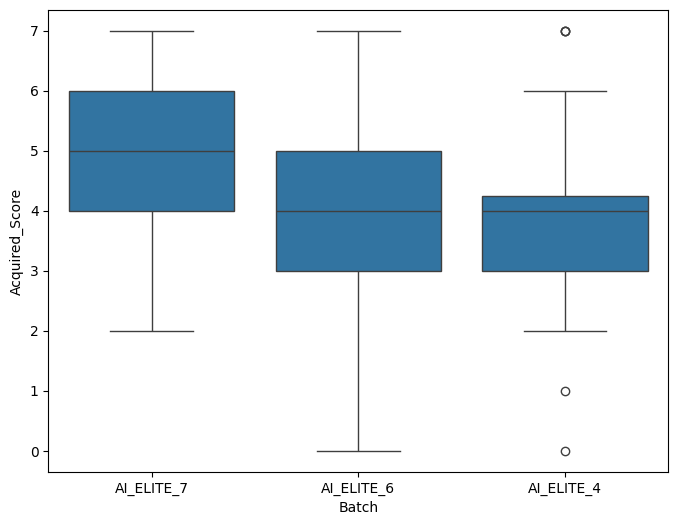

In [50]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Batch',y='Acquired_Score',data=df)